# About Data


**What data are we exploring today ?**

The Dataset contains infomation about goods and products traded internationally (Import, Export, and  Re-Export).

It Includes crucial aspect of trade such as  Quaterly, Monthly Data based on 21 major commodity categories in a time span of 2011-2018.

Additionally it contains:

Weight (Ton): Shows the precise quatity of traded goods.

Value (Million Dirham): Indicated the monetory worth of traded goods.


**It's relevancy for analytical reasons**

The dataset is well-structured with separate numerical and categorical fields such as year, month, item section codes, and descriptions. This makes it ideal for data processing and visualization with tools like NumPy and Pandas.

**Why this Dataset?**
1. **Economic Importance**: Foreign trade data is critical for understanding economic trends.
2. **Analytical Scope**: Enables exploration of trends, patterns, and relationships in trade metrics.
3. **Time-Series Nature**: Multi-year data supports trend and growth rate analyses.


# Data Preparation and Exploration

**Importing the required libraries**

[1] Pandas:  For data manipulation and preparation.

[2] Numpy: For numerical computations and statistical analysis.

[3] Matplotlib: For creating basic visualizations.

[4] Seaborn: For advanced statistical visualizations.

[5] Math: For advanced mathematical operations.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar  # Import the calendar module
import requests #Use to get data from API
import nltk
from nltk.corpus import stopwords #Getting Stopwords from NLTK
import gensim
from gensim.utils import simple_preprocess #For preprocessing Text
from wordcloud import WordCloud #To Generate WordCloud

%matplotlib inline
sns.set(color_codes=True)
pd.options.display.float_format = '{:.2f}'.format #Displaying numbers in strandard form not in scientific form

**Connecting API**

In [2]:
url = "https://admin.bayanat.ae/api/opendata/GetDatasetResourceData"
params = {
    "resourceID": "QaYO4kny3tAqePEVQGyC35B_Cp_E_unGeGw0Os01tYs"
}

response = requests.get(url, params=params)
data = response.json()
df = pd.DataFrame(data) #converting into dataframe
print("Data imported successfully")
output_file = "2011-2018ForeignTrade.csv"
df.to_csv(output_file, index=False) #downloading output file

Data imported successfully


**Loading the data into the data frame**

In [3]:
data=pd.read_csv("2011-2018ForeignTrade.csv")
data.head(2) # Display first 2 data

,YEAR,QUARTER,MONTH,ITEM_SECTION_CODE,SECTION_DESC_EN,SECTION_DESC_AR,WT_IMPORT,VAL_IMPORT,WT_EXPORT,VAL_EXPORT,WT_REXPORT,VAL_REXPORT
0,2011,1,1,1,LIVE ANIMALS AND THEIR PRODUCTS,الحيوانات الحية ومنتجاتها,94272741.74,851765809.77,7096833.43,98927481.12,4192538.23,41311818.73
1,2011,1,1,2,VEGETABLE PRODUCTS,منتجات نباتية,1344653498.85,3099679003.48,10512395.84,34938082.60,187465151.13,613119334.98


In [4]:
data.tail(2) # Display last  data

,YEAR,QUARTER,MONTH,ITEM_SECTION_CODE,SECTION_DESC_EN,SECTION_DESC_AR,WT_IMPORT,VAL_IMPORT,WT_EXPORT,VAL_EXPORT,WT_REXPORT,VAL_REXPORT
2014,2018,4,12,20,MISCELLANEOUS MANUFACTURED ARTICLES,سلع ومنتجات مختلفة,69376474.73,1350600572.27,10888753.52,129490570.87,22366679.60,462180720.13
2015,2018,4,12,21,"PIECES AND ANTIQUES 'WORKS OF ART, COLLECTORS",تحف فنية وقطع للمجموعات وقطع اثرية,244298.15,88285597.12,59663.20,1422377.90,1095190.89,263676903.46


**Renaming Columns and converting to Title case**

In [5]:
data.rename(columns={'SECTION_DESC_EN': 'SECTION_DESC','ITEM_SECTION_CODE':'ITEM_CODE'}, inplace=True)
data.columns = data.columns.str.title()
data.head(2)

,Year,Quarter,Month,Item_Code,Section_Desc,Section_Desc_Ar,Wt_Import,Val_Import,Wt_Export,Val_Export,Wt_Rexport,Val_Rexport
0,2011,1,1,1,LIVE ANIMALS AND THEIR PRODUCTS,الحيوانات الحية ومنتجاتها,94272741.74,851765809.77,7096833.43,98927481.12,4192538.23,41311818.73
1,2011,1,1,2,VEGETABLE PRODUCTS,منتجات نباتية,1344653498.85,3099679003.48,10512395.84,34938082.60,187465151.13,613119334.98


**Dropping irrelevant column**

In [6]:
data.drop('Section_Desc_Ar',axis=1,inplace=True)
data.keys()

Index(['Year', 'Quarter', 'Month', 'Item_Code', 'Section_Desc', 'Wt_Import',
       'Val_Import', 'Wt_Export', 'Val_Export', 'Wt_Rexport', 'Val_Rexport'],
      dtype='object')



---
"Section_Desc_Ar" is repeated column of "Section_Desc_En" that's the reason we droped this column.

**Checking data for Null values**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          2016 non-null   int64  
 1   Quarter       2016 non-null   int64  
 2   Month         2016 non-null   int64  
 3   Item_Code     2016 non-null   int64  
 4   Section_Desc  2016 non-null   object 
 5   Wt_Import     2016 non-null   float64
 6   Val_Import    2016 non-null   float64
 7   Wt_Export     2016 non-null   float64
 8   Val_Export    2016 non-null   float64
 9   Wt_Rexport    2016 non-null   float64
 10  Val_Rexport   2016 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 173.4+ KB


In [8]:
data.isna().any()

,0
Year,False
Quarter,False
Month,False
Item_Code,False
Section_Desc,False
Wt_Import,False
Val_Import,False
Wt_Export,False
Val_Export,False
Wt_Rexport,False


In [9]:
data.isnull().sum()

,0
Year,0
Quarter,0
Month,0
Item_Code,0
Section_Desc,0
Wt_Import,0
Val_Import,0
Wt_Export,0
Val_Export,0
Wt_Rexport,0




---


We have noticed that none of the columns contain a null values.

**Check for Dublicate values**

In [10]:
duplicate_rows = data[data.duplicated()]
print("number of duplicate rows: ", len(duplicate_rows))

number of duplicate rows:  0




---

Their is no dublicate row in the data so we are good to go.

**Statistical Summary of Numerical Data:**


In [11]:
data.describe()

,Year,Quarter,Month,Item_Code,Wt_Import,Val_Import,Wt_Export,Val_Export,Wt_Rexport,Val_Rexport
count,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00,2016.00
mean,2014.50,2.50,6.50,11.00,366418566.57,3746595175.03,348495736.74,703197962.88,68408397.67,1695978380.60
std,2.29,1.12,3.45,6.06,691630061.72,5690814961.39,1268086280.98,1453106657.25,115777645.97,3286489884.12
min,2011.00,1.00,1.00,1.00,2783.06,499553.50,0.00,0.00,463.00,9200.00
25%,2012.75,1.75,3.75,6.00,13927178.05,527929041.24,505526.37,24013621.33,3709405.81,101059950.26
50%,2014.50,2.50,6.50,11.00,151180436.67,1638971917.15,17453291.85,178024866.83,26878076.52,502514698.91
75%,2016.25,3.25,9.25,16.00,323801809.84,3729349526.38,98027284.00,701138156.52,85635688.41,1166512909.91
max,2018.00,4.00,12.00,21.00,9717905035.25,31027841739.22,8152421730.20,13518333294.88,1114768029.86,16509439476.30




---


The dataset spans from 2011 to 2018 across all quarters and months.

*   Imports (Weight and Value):

    *   The average weight of imports is 366.42 million, with a maximum of 9.71 billion.

    *   The average value of imports is 3.75 billion, with a maximum of 31.03 billion.

*   Exports (Weight and Value):

    *   The average weight of exports is 348.50 million, with a maximum of 8.15 billion.

    *   The average value of exports is 703.20 million, with a maximum of 13.52 billion.

*   Re-exports (Weight and Value):

    *   Re-exported weights and values also vary significantly, with maxima of 1.11 billion and 16.51 billion, respectively.


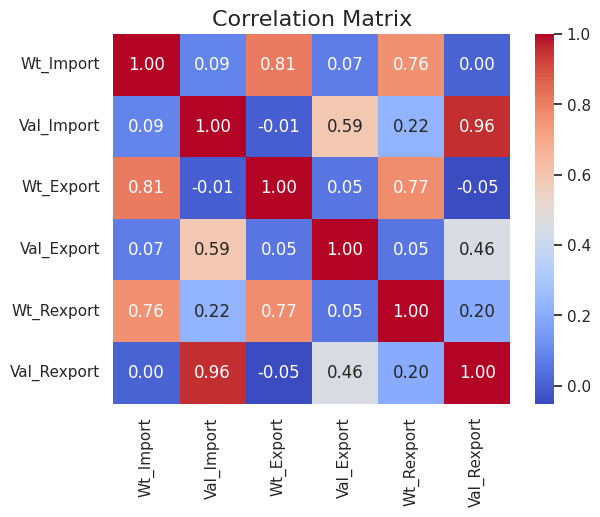

In [ ]:
correlation_matrix = data[['Wt_Import', 'Val_Import', 'Wt_Export', 'Val_Export', 'Wt_Rexport', 'Val_Rexport']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

**Categorical Data:**


In [12]:
item_section_dict = dict(zip(data['Item_Code'], data['Section_Desc']))
item_section_dict

{1: 'LIVE ANIMALS AND THEIR PRODUCTS',
 2: 'VEGETABLE PRODUCTS',
 3: 'ANIMAL OR VEGETABLE FATS, OILS AND WAXES',
 4: 'FOODSTUFFS, BEVERAGES, SPIRITS AND TOBACCO',
 5: 'MINERAL PRODUCTS',
 6: 'PRODUCTS OF THE CHEMICAL OR ALLIED INDUSTRIES',
 7: 'PLASTICS, RUBBER AND ARTICLES THEREOF',
 8: 'ARTICLES OF LEATHER AND ANIMAL GUT; TRAVEL GOODS',
 9: 'ARTICLES OF WOOD, CORK; BASKETWARE AND WICKERWORK',
 10: 'PULP OF WOOD, WASTE, SCRAP AND ARTICLES OF PAPER',
 11: 'TEXTILES AND TEXTILE ARTICLES',
 12: 'FOOTWEAR,UMBRELLAS,ARTICLES OF FEATHER & HAIR',
 13: 'ARTICLES OF STONE, MICA;CERAMIC PRODUCTS AND GLASS',
 14: 'PEARLS, STONES, PRECIOUS METALS AND ITS ARTICLES',
 15: 'BASE METALS AND ARTICLES OF BASE METAL',
 16: 'MACHINERY, SOUND RECORDERS, REPRODUCERS AND PARTS',
 17: 'VEHICLES OF TRANSPORT',
 18: 'PHOTOGRAPHIC, MEDICAL, MUSICAL INSTRUMENTS & PARTS',
 19: 'ARMS AND AMMUNITION; PARTS & ACCESSORIES',
 20: 'MISCELLANEOUS MANUFACTURED ARTICLES',
 21: "PIECES AND ANTIQUES 'WORKS OF ART, COLLECTOR



---


*   Section_Desc: There are 21 unique categories describing the types of goods, such as "LIVE ANIMALS AND THEIR PRODUCTS" and "MINERAL PRODUCTS."


# **Analysing Data**

In [13]:
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each



---


Dowloading English Stopwords

In [14]:
stop_words = stopwords.words('english')
stop_words.extend(['products', 'articles','parts']) # Adding unwanted Stopword based on data

In [18]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
      if len(token) >= 1 and token not in stop_words:
        result.append(token)
    return result



---


Creating a function to process data

In [19]:
data['Section_Desc'].unique()

array(['LIVE ANIMALS AND THEIR PRODUCTS', 'VEGETABLE PRODUCTS',
       'ANIMAL OR VEGETABLE FATS, OILS AND WAXES',
       'FOODSTUFFS, BEVERAGES, SPIRITS AND TOBACCO', 'MINERAL PRODUCTS',
       'PRODUCTS OF THE CHEMICAL OR ALLIED INDUSTRIES',
       'PLASTICS, RUBBER AND ARTICLES THEREOF',
       'ARTICLES OF LEATHER AND ANIMAL GUT; TRAVEL GOODS',
       'ARTICLES OF WOOD, CORK; BASKETWARE AND WICKERWORK',
       'PULP OF WOOD, WASTE, SCRAP AND ARTICLES OF PAPER',
       'TEXTILES AND TEXTILE ARTICLES',
       'FOOTWEAR,UMBRELLAS,ARTICLES OF FEATHER & HAIR',
       'ARTICLES OF STONE, MICA;CERAMIC PRODUCTS AND GLASS',
       'PEARLS, STONES, PRECIOUS METALS AND ITS ARTICLES',
       'BASE METALS AND ARTICLES OF BASE METAL',
       'MACHINERY, SOUND RECORDERS, REPRODUCERS AND PARTS',
       'VEHICLES OF TRANSPORT',
       'PHOTOGRAPHIC, MEDICAL, MUSICAL INSTRUMENTS & PARTS',
       'ARMS AND AMMUNITION; PARTS & ACCESSORIES',
       'MISCELLANEOUS MANUFACTURED ARTICLES',
       "PIECES 

In [20]:
unique_desc = pd.DataFrame(data['Section_Desc'].unique(), columns=['Section_Desc'])
unique_desc['processed_desc'] = unique_desc['Section_Desc'].apply(preprocess)



---

Creating a DataFrame of unique value in Section_Desc for further process

In [21]:
unique_desc['processed_desc'].head(2)

,processed_desc
0,"[live, animals]"
1,[vegetable]


In [22]:
unique_desc['processed_desc'].apply(lambda x: " ".join(x))

,processed_desc
0,live animals
1,vegetable
2,animal vegetable fats oils waxes
3,foodstuffs beverages spirits tobacco
4,mineral
5,chemical allied industries
6,plastics rubber thereof
7,leather animal gut travel goods
8,wood cork basketware wickerwork
9,pulp wood waste scrap paper




---
Since the Data is in list will concate and remove **[ , ]** from the Data


In [23]:
sentences = unique_desc['processed_desc'].tolist()
# Convert each list of words within 'sentences' into a single string
sentences_as_strings = [' '.join(sentence) for sentence in sentences]
# Now you can join the strings in 'sentences_as_strings'
words_as_one_string = " ".join(sentences_as_strings)

In [24]:
words_as_one_string

'live animals vegetable animal vegetable fats oils waxes foodstuffs beverages spirits tobacco mineral chemical allied industries plastics rubber thereof leather animal gut travel goods wood cork basketware wickerwork pulp wood waste scrap paper textiles textile footwear umbrellas feather hair stone mica ceramic glass pearls stones precious metals base metals base metal machinery sound recorders reproducers vehicles transport photographic medical musical instruments arms ammunition accessories miscellaneous manufactured pieces antiques works art collectors'

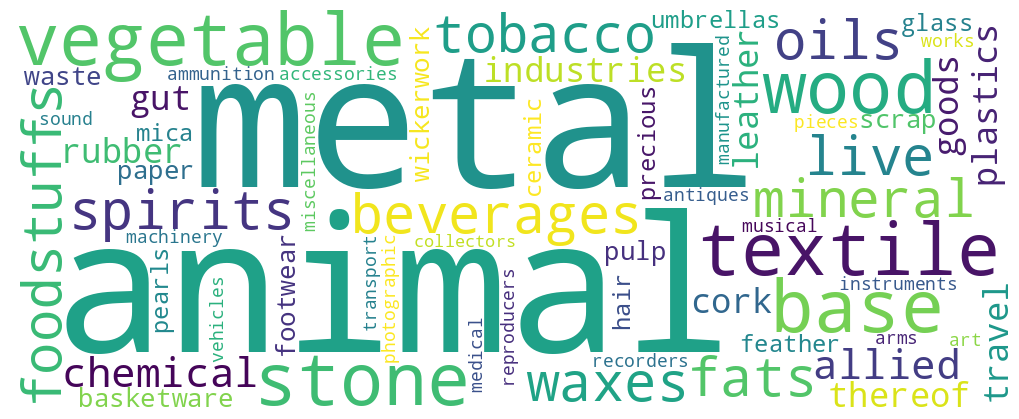

In [25]:
wordcloud = WordCloud(width=1000, height=400,
                      background_color='white',
                      min_font_size=10,
                      max_words=150,  # Limit the number of words
                      colormap='viridis').generate(words_as_one_string)

plt.figure(figsize=(10, 8), facecolor=None)  # Adjust figure size for better layout
plt.imshow(wordcloud)
plt.axis("off")  # Remove axis
plt.tight_layout(pad=0)  # Reduce padding
plt.show()



---
Based on  WordCloud we can Conclude that the Product & Goods related to "Animal", "Metal" are highly traded amongst this years.


# **Feature Engineering**

In [141]:
def format_number(num):
    if num >= 1e12:
        return f"{num / 1e12:.2f} T"  # Convert to trillion
    elif num >= 1e9:
        return f"{num / 1e9:.2f} B"  # Convert to billion
    elif num >= 1e6:
        return f"{num / 1e6:.2f} M"  # Convert to million
    elif num >= 1e3:
        return f"{num / 1e3:.2f} K" # Counvert to thousands
    else:
        return f"{num:.1f}"



---

Creating a funtion to display data in more readable format.

In [28]:
def get_trade_data(year=None, quarter=None):

    filtered_data = data.copy()  # Creating a copy to avoid SettingWithCopyWarning
    if year:            # Filter by year if provided
        filtered_data = filtered_data[filtered_data['Year'] == year]

    if quarter:     # Filter by quarter if provided
        filtered_data = filtered_data[filtered_data['Quarter'] == quarter]

    # Group by 'Section_Desc' and calculate sums
    grouped_data = filtered_data.groupby('Section_Desc')[
        ['Wt_Import', 'Val_Import', 'Wt_Export', 'Val_Export', 'Wt_Rexport', 'Val_Rexport']
    ].sum().reset_index()

    # Apply formatting to weight and value columns
    for col in ['Wt_Import', 'Val_Import', 'Wt_Export', 'Val_Export', 'Wt_Rexport', 'Val_Rexport']:

              if 'Wt' in col:
                grouped_data[col] = grouped_data[col].apply(lambda x: format_number(x) + " tons")
              else:
                grouped_data[col] = grouped_data[col].apply(lambda x: format_number(x) + " dirhams")

    return grouped_data


In [159]:
get_trade_data(2012,quarter=4)

,Section_Desc,Wt_Import,Val_Import,Wt_Export,Val_Export,Wt_Rexport,Val_Rexport
0,"ANIMAL OR VEGETABLE FATS, OILS AND WAXES",176.67 M tons,814.61 M dirhams,60.46 M tons,270.24 M dirhams,12.39 M tons,32.28 M dirhams
1,ARMS AND AMMUNITION; PARTS & ACCESSORIES,332.58 K tons,16.99 M dirhams,5.22 K tons,2.69 M dirhams,552.41 K tons,4.00 M dirhams
2,ARTICLES OF LEATHER AND ANIMAL GUT; TRAVEL GOODS,26.71 M tons,1.19 B dirhams,994.27 K tons,6.29 M dirhams,8.54 M tons,275.61 M dirhams
3,"ARTICLES OF STONE, MICA;CERAMIC PRODUCTS AND G...",671.37 M tons,1.99 B dirhams,540.54 M tons,698.37 M dirhams,167.32 M tons,680.32 M dirhams
4,"ARTICLES OF WOOD, CORK; BASKETWARE AND WICKERWORK",494.01 M tons,1.08 B dirhams,7.38 M tons,33.70 M dirhams,86.16 M tons,267.66 M dirhams
5,BASE METALS AND ARTICLES OF BASE METAL,2.62 B tons,15.72 B dirhams,1.18 B tons,5.59 B dirhams,510.71 M tons,3.63 B dirhams
6,"FOODSTUFFS, BEVERAGES, SPIRITS AND TOBACCO",1.14 B tons,6.04 B dirhams,617.18 M tons,2.98 B dirhams,198.62 M tons,2.51 B dirhams
7,"FOOTWEAR,UMBRELLAS,ARTICLES OF FEATHER & HAIR",44.20 M tons,1.48 B dirhams,794.64 K tons,8.78 M dirhams,18.53 M tons,436.94 M dirhams
8,LIVE ANIMALS AND THEIR PRODUCTS,337.03 M tons,3.26 B dirhams,30.46 M tons,342.76 M dirhams,24.85 M tons,239.02 M dirhams
9,"MACHINERY, SOUND RECORDERS, REPRODUCERS AND PARTS",840.63 M tons,58.08 B dirhams,256.52 M tons,1.13 B dirhams,398.07 M tons,35.66 B dirhams




---
`get_trade_data()` is use to sum and filter records based on Year or Quarter or both grouping it with the Section_Desc

For Ex:  get_trade_data(2012,quarter=4)

Will provide total data based on all Section_Desc with filter of 2012 & Quarter=4

In [ ]:
yearly_summary = data.groupby('Year').agg({
    'Val_Import': 'sum',
    'Val_Export': 'sum',
    'Val_Rexport': 'sum',
    'Wt_Import': 'sum',
    'Wt_Export': 'sum',
    'Wt_Rexport': 'sum',
    'Total_Trade_Value': 'sum',
    'Total_Trade_Weight': 'sum'
})
yearly_summary['Total_Trade_Value_Percentage'] = (yearly_summary['Total_Trade_Value'] / yearly_summary['Total_Trade_Value'].sum()) * 100
yearly_summary['Total_Trade_Weight_Percentage'] = (yearly_summary['Total_Trade_Weight'] / yearly_summary['Total_Trade_Weight'].sum()) * 100

yearly_summary=pd.DataFrame(yearly_summary)

In [ ]:
Quarterly_summary = data.groupby('Quarter').agg({
    'Val_Import': 'sum',
    'Val_Export': 'sum',
    'Val_Rexport': 'sum',
    'Wt_Import': 'sum',
    'Wt_Export': 'sum',
    'Wt_Rexport': 'sum',
    'Total_Trade_Value': 'sum',
    'Total_Trade_Weight': 'sum'
})
Quarterly_summary['Total_Trade_Value_Percentage'] = (Quarterly_summary['Total_Trade_Value'] / Quarterly_summary['Total_Trade_Value'].sum()) * 100
Quarterly_summary['Total_Trade_Weight_Percentage']= (Quarterly_summary['Total_Trade_Weight'] / Quarterly_summary['Total_Trade_Weight'].sum()) * 100

Quarterly_summary=pd.DataFrame(Quarterly_summary)

In [ ]:
Monthly_summary = data.groupby('Month').agg({
    'Val_Import': 'sum',
    'Val_Export': 'sum',
    'Val_Rexport': 'sum',
    'Wt_Import': 'sum',
    'Wt_Export': 'sum',
    'Wt_Rexport': 'sum',
    'Total_Trade_Value': 'sum',
    'Total_Trade_Weight': 'sum'
})
Monthly_summary['Total_Trade_Value_Percentage'] = (Monthly_summary['Total_Trade_Value'] / Monthly_summary['Total_Trade_Value'].sum()) * 100
Monthly_summary['Total_Trade_Weight_Percentage']= (Monthly_summary['Total_Trade_Weight'] / Monthly_summary['Total_Trade_Weight'].sum()) * 100

Monthly_summary=pd.DataFrame(Monthly_summary)

# **Statistical Analysis**

In [147]:
summary=data.copy()
summary.keys()

Index(['Year', 'Quarter', 'Month', 'Item_Code', 'Section_Desc', 'Wt_Import',
       'Val_Import', 'Wt_Export', 'Val_Export', 'Wt_Rexport', 'Val_Rexport',
       'Total_Trade_Value', 'Total_Trade_Weight', 'Trade_Type', 'Value',
       'Weight'],
      dtype='object')

In [ ]:
#Advanced Grouping: Aggregate data by `SECTION_DESC_EN` and compute mean and max values for imports.
section_analysis = data.groupby('Section_Desc').agg({
    'Val_Import': ['mean','min', 'max'],
    'Val_Export': ['mean','min', 'max'],
    'Val_Rexport': ['mean','min', 'max']
}).reset_index()

section_analysis.columns = ['Section_Desc', 'Import_Mean', 'Import_Min', 'Import_Max', 'Export_Mean', 'Export_Min', 'Export_Max', 'Rexport_Mean', 'Rexport_Min', 'Rexport_Max']
# Apply formatting to numeric columns
columns_to_format = ['Import_Mean', 'Import_Min', 'Import_Max', 'Export_Mean', 'Export_Min', 'Export_Max', 'Rexport_Mean', 'Rexport_Min', 'Rexport_Max']
# Format values in each numeric column
for col in columns_to_format:
    section_analysis[col] = section_analysis[col].apply(format_number)

print("Section Analysis:")
section_analysis=pd.DataFrame(section_analysis)
section_analysis

Section Analysis:


,Section_Desc,Import_Mean,Import_Min,Import_Max,Export_Mean,Export_Min,Export_Max,Rexport_Mean,Rexport_Min,Rexport_Max
0,"ANIMAL OR VEGETABLE FATS, OILS AND WAXES",213.52M,84.47M,556.48M,99.95M,56.84M,262.67M,13.83M,4.72M,53.20M
1,ARMS AND AMMUNITION; PARTS & ACCESSORIES,19.23M,499.55K,314.87M,1.05M,0.0,15.27M,1.40M,9.20K,14.17M
2,ARTICLES OF LEATHER AND ANIMAL GUT; TRAVEL GOODS,409.90M,226.16M,557.13M,3.57M,811.62K,11.01M,113.25M,62.40M,187.94M
3,"ARTICLES OF STONE, MICA;CERAMIC PRODUCTS AND G...",708.35M,581.35M,1.30B,253.15M,177.33M,534.78M,229.10M,120.15M,1.29B
4,"ARTICLES OF WOOD, CORK; BASKETWARE AND WICKERWORK",388.85M,266.11M,494.25M,13.03M,1.80M,70.70M,75.51M,44.88M,178.24M
5,BASE METALS AND ARTICLES OF BASE METAL,5.67B,4.35B,8.56B,2.63B,914.78M,7.04B,1.02B,608.97M,3.68B
6,"FOODSTUFFS, BEVERAGES, SPIRITS AND TOBACCO",2.28B,1.24B,3.31B,1.20B,570.52M,1.94B,966.26M,529.50M,1.55B
7,"FOOTWEAR,UMBRELLAS,ARTICLES OF FEATHER & HAIR",625.43M,305.48M,959.57M,4.15M,1.06M,11.00M,232.85M,119.91M,407.30M
8,LIVE ANIMALS AND THEIR PRODUCTS,1.23B,851.77M,1.52B,149.66M,57.35M,324.49M,116.95M,36.59M,940.16M
9,"MACHINERY, SOUND RECORDERS, REPRODUCERS AND PARTS",21.17B,14.75B,28.09B,716.74M,157.84M,2.24B,13.31B,9.62B,16.51B



**Imports**

**Mean Import Values**
- **Highest**: "MACHINERY, SOUND RECORDERS, REPRODUCERS AND PARTS" at **21.17 billion AED**.
- **Lowest**: "ARMS AND AMMUNITION; PARTS & ACCESSORIES" at **19.23 million AED**.

**Range of Import Values**
- **Widest Range**: "MINERAL PRODUCTS" with a range of **13.96 billion AED** (Max = 15.49B AED, Min = 1.53B AED).
- **Narrowest Range**: "ARMS AND AMMUNITION; PARTS & ACCESSORIES" with a range of **314.37M AED**.

---

**Exports**

**Mean Export Values**
- **Highest**: "PEARLS, STONES, PRECIOUS METALS AND ITS ARTICLES" at **6.08 billion AED**.
- **Lowest**: "ARMS AND AMMUNITION; PARTS & ACCESSORIES" at **1.05 million AED**.

**Range of Export Values**
- **Widest Range**: "VEHICLES OF TRANSPORT" with a range of **2.64 billion AED**.
- **Narrowest Range**: "ARMS AND AMMUNITION; PARTS & ACCESSORIES" with a range of **15.27M AED**.

---

**Re-exports**

**Mean Re-export Values**
- **Highest**: "PEARLS, STONES, PRECIOUS METALS AND ITS ARTICLES" at **8.55 billion AED**.
- **Lowest**: "ANIMAL OR VEGETABLE FATS, OILS AND WAXES" at **13.83 million AED**.

**Range of Re-export Values**
- **Widest Range**: "PIECES AND ANTIQUES 'WORKS OF ART, COLLECTORS" with a range of **1.28 billion AED**.
- **Narrowest Range**: "ARMS AND AMMUNITION; PARTS & ACCESSORIES" with a range of **14.16 million AED**.

---

**Key Observations**
- **Highest Trade Values**:
  - **Imports**: "MACHINERY, SOUND RECORDERS, REPRODUCERS AND PARTS" (**21.17B AED**).
  - **Exports**: "PEARLS, STONES, PRECIOUS METALS AND ITS ARTICLES" (**6.08B AED**).
  - **Re-exports**: "PEARLS, STONES, PRECIOUS METALS AND ITS ARTICLES" (**8.55B AED**).

- **Products with Consistently Low Trade**:
  - "ARMS AND AMMUNITION; PARTS & ACCESSORIES" have minimal trade activity (**19.23M AED** in imports, **1.05M AED** in exports).

- **Re-exports**:
  - Certain categories, like "PEARLS, STONES, PRECIOUS METALS" and "VEHICLES OF TRANSPORT", demonstrate strong intermediary trade roles, contributing significantly to re-export volumes.


In [41]:
data['Total_Trade_Value'] = (
    data['Val_Import'] + data['Val_Export'] + data['Val_Rexport']
)
data['Total_Trade_Weight'] = (
    data['Wt_Import'] + data['Wt_Export'] + data['Wt_Rexport']
)

In [148]:
summary['Total_Trade_Percentage']=(summary['Total_Trade_Value']/summary['Total_Trade_Value'].sum())*100

In [105]:
print("Yearly Summary:")
yearly_summary

Yearly Summary:


,Val_Import,Val_Export,Val_Rexport,Wt_Import,Wt_Export,Wt_Rexport,Total_Trade_Value,Total_Trade_Weight,Total_Trade_Value_Percentage,Total_Trade_Weight_Percentage
Year,,,,,,,,,,
2011,836420917191.84,127741843429.94,375181117591.71,66046419175.67,25842693746.29,14569789370.70,1339343878213.49,106458902292.66,10.81,6.74
2012,919893093876.59,186041213885.06,399737226895.98,73860414147.73,75963390757.80,16419462443.63,1505671534657.63,166243267349.16,12.15,10.53
2013,966977886988.30,168603402711.44,443343591931.79,93909687766.44,86799216721.49,17285467098.49,1578924881631.54,197994371586.42,12.74,12.54
2014,991930588222.80,157928376266.29,455730497864.02,89190832555.29,96429400376.58,18167757620.28,1605589462353.11,203787990552.15,12.96,12.90
2015,952306420069.92,185454252649.72,418431271920.16,93669510720.27,101770494505.29,17621807098.02,1556191944639.81,213061812323.58,12.56,13.49
2016,968919141824.35,194954615253.66,400388905741.23,101279499539.54,112854649753.31,18591112808.12,1564262662819.24,232725262100.97,12.63,14.74
2017,979015101557.75,184995408531.65,447909030476.32,106154787711.41,95671936457.09,18461125676.48,1611919540565.72,220287849844.99,13.01,13.95
2018,937672723122.32,211927980441.19,478370772871.60,114588678584.74,107235622945.84,16794807588.18,1627971476435.11,238619109118.76,13.14,15.11




---

yearly_summary: Shows percentage distribution of (Weight, value)  based on Years.


In [106]:
print("Quarterly Summary:")
Quarterly_summary

Quarterly Summary:


,Val_Import,Val_Export,Val_Rexport,Wt_Import,Wt_Export,Wt_Rexport,Total_Trade_Value,Total_Trade_Weight,Total_Trade_Value_Percentage,Total_Trade_Weight_Percentage
Quarter,,,,,,,,,,
1,1852960962073.17,346109765219.57,864845971243.11,175990849438.31,169455218671.40,34648854843.08,3063916698535.85,380094922952.80,24.73,24.07
2,1879179597649.82,362747528775.51,850852726618.98,178549259041.68,177439872051.32,35140488482.66,3092779853044.30,391129619575.66,24.96,24.77
3,1885109599672.95,361969185005.01,841790706065.33,197243364427.27,173695331033.97,34559100817.78,3088869490743.29,405497796279.02,24.93,25.68
4,1935885713457.93,346820614168.87,861603011365.39,186916357293.83,181976983507.00,33562885560.39,3144309338992.19,402456226361.22,25.38,25.49




---


Quarterly_summary: Shows percentage distribution of (Weight, Value)  based on Quarter.

In [108]:
print("Monthly Summary:")
Monthly_summary

Monthly Summary:


,Val_Import,Val_Export,Val_Rexport,Wt_Import,Wt_Export,Wt_Rexport,Total_Trade_Value,Total_Trade_Weight,Total_Trade_Value_Percentage,Total_Trade_Weight_Percentage
Month,,,,,,,,,,
1,605956085306.62,112707122235.43,271898876142.86,60583476618.69,55921597790.89,11501245305.53,990562083684.91,128006319715.11,7.99,8.11
2,582198315997.13,112944096133.26,285803022106.16,54981686033.43,53822818163.11,11606935843.92,980945434236.55,120411440040.46,7.92,7.62
3,664806560769.42,120458546850.87,307144072994.09,60425686786.20,59710802717.40,11540673693.63,1092409180614.38,131677163197.23,8.82,8.34
4,622203511458.27,121756593189.53,285349931127.81,56504464227.07,59457334685.22,11146026848.46,1029310035775.62,127107825760.75,8.31,8.05
5,647659906082.03,122385290313.73,291368962648.11,62053454525.39,61866560044.77,11563842203.15,1061414159043.87,135483856773.31,8.57,8.58
6,609316180109.52,118605645272.25,274133832843.05,59991340289.22,56115977321.33,12430619431.05,1002055658224.82,128537937041.61,8.09,8.14
7,646263099334.17,122169226491.71,283124481857.74,75525921560.76,55442201048.43,11414494406.46,1051556807683.62,142382617015.64,8.49,9.02
8,621132659067.51,120947601365.01,271820791689.98,64253602518.21,58916734408.40,11589523369.39,1013901052122.50,134759860296.00,8.18,8.53
9,617713841271.26,118852357148.29,286845432517.62,57463840348.31,59336395577.15,11555083041.92,1023411630937.17,128355318967.37,8.26,8.13




---
Monthly_summary: Shows percentage distribution of (Weight, Value) based on Month


In [ ]:
#Ratios of Trade Types to Total Trade Value
data['Import_Ratio'] = data['Val_Import'] / data['Total_Trade_Value']
data['Export_Ratio'] = data['Val_Export'] / data['Total_Trade_Value']
data['Rexport_Ratio'] = data['Val_Rexport'] / data['Total_Trade_Value']

# Year-on-Year Growth for Total Trade Value
data['Yearly_Trade_Growth'] = data.groupby('Year')['Total_Trade_Value'].pct_change() * 100
data['Yearly_Trade_Growth'][0]=0

# Dominant Trade Type
def dominant_trade_type(row):
    values = {
        'IMPORT': row['Val_Import'],
        'EXPORT': row['Val_Export'],
        'REEXPORT': row['Val_Rexport']
    }
    return max(values, key=values.get)

data['Dominant_Trade_Type'] = data.apply(dominant_trade_type, axis=1)

# Display the new features in the dataset
data[['Total_Trade_Value', 'Import_Ratio', 'Export_Ratio', 'Rexport_Ratio',
            'Yearly_Trade_Growth', 'Dominant_Trade_Type']]


<ipython-input-154-d8526296a6de>:8: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-154-d8526296a6de>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

,Total_Trade_Value,Import_Ratio,Export_Ratio,Rexport_Ratio,Yearly_Trade_Growth,Dominant_Trade_Type
0,992005109.62,0.86,0.10,0.04,0.00,IMPORT
1,3747736421.06,0.83,0.01,0.16,277.79,IMPORT
2,460474063.77,0.53,0.46,0.02,-87.71,IMPORT
3,2643972987.11,0.55,0.22,0.24,474.18,IMPORT
4,3743352555.49,0.50,0.18,0.32,41.58,IMPORT
...,...,...,...,...,...,...
2011,16653405117.74,0.63,0.01,0.35,-55.50,IMPORT
2012,3315699374.31,0.65,0.02,0.34,-80.09,IMPORT
2013,10596240.80,0.72,0.00,0.28,-99.68,IMPORT
2014,1942271863.27,0.70,0.07,0.24,18229.82,IMPORT




---

**Dominant_Trade_Type**: Shows the dominating trade type of all data

# Data Visualizations


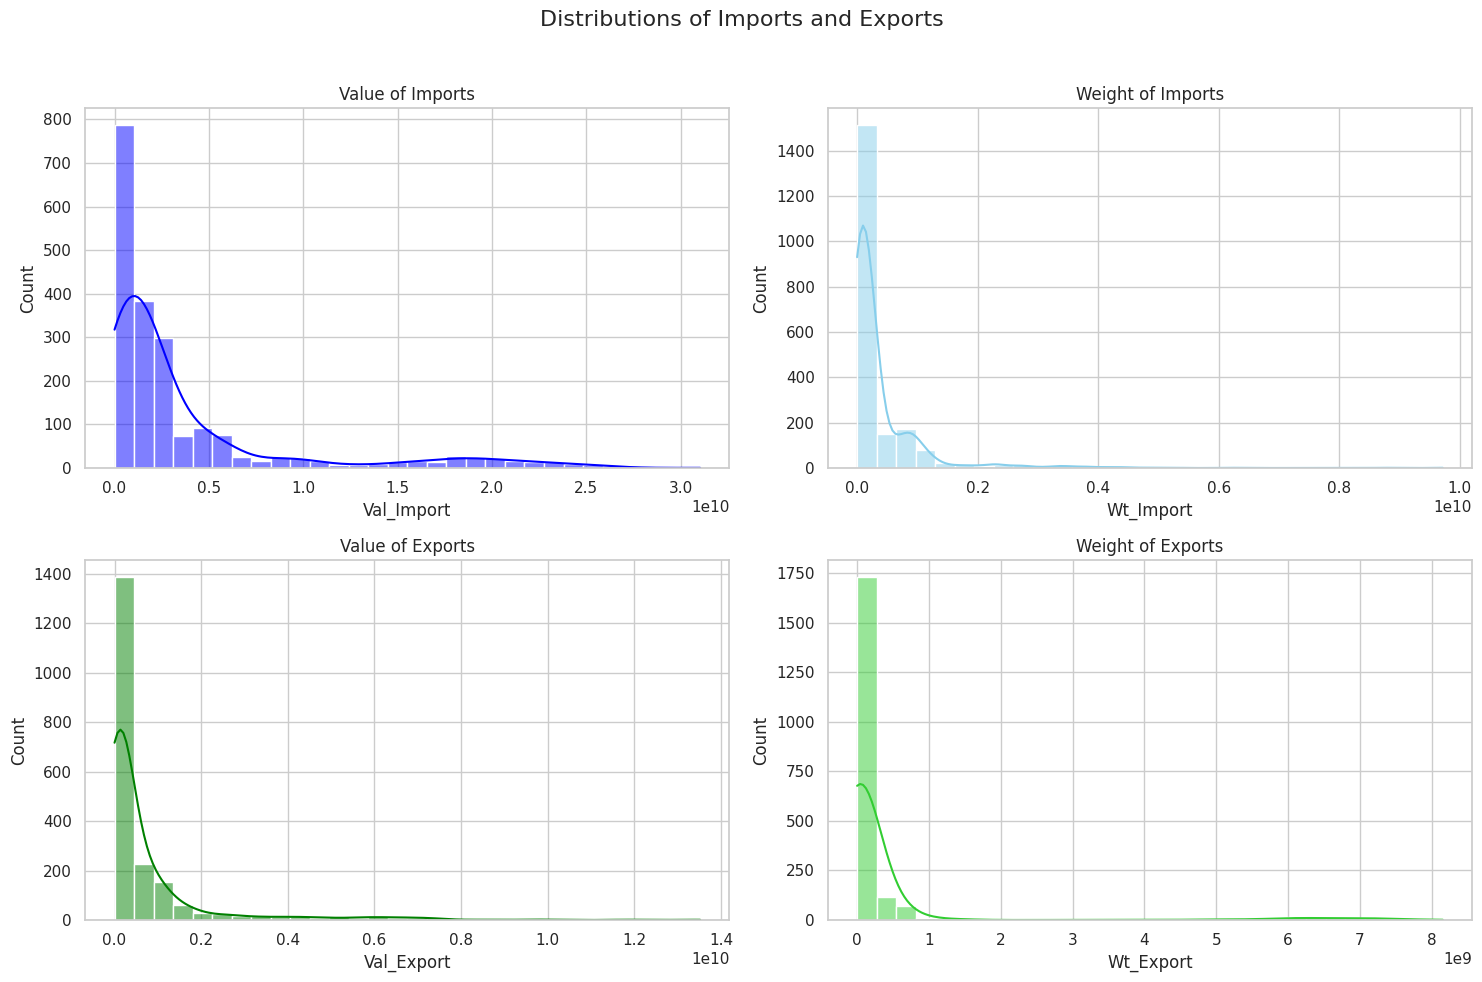

In [ ]:
# Setting the style for plots
sns.set(style="whitegrid")

# Distribution of Import and Export values
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distributions of Imports and Exports", fontsize=16)

sns.histplot(data['Val_Import'], bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Value of Imports')

sns.histplot(data['Wt_Import'], bins=30, kde=True, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Weight of Imports')

sns.histplot(data['Val_Export'], bins=30, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Value of Exports')

sns.histplot(data['Wt_Export'], bins=30, kde=True, ax=axes[1, 1], color='limegreen')
axes[1, 1].set_title('Weight of Exports')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




In [150]:
def plot_trade_comparisons(data):
    trade_types = ['Import', 'Export', 'Rexport']

    # Convert month numbers to month names
    data['Months'] = data.index.map(lambda month_num: calendar.month_name[month_num])

    # Plotting Value Comparisons
    fig_value = px.line(
        data,
        x='Months',  # Use the new 'Month' column for the x-axis
        y=[f'Val_{trade_type}' for trade_type in trade_types],
        title='Comparison of Import, Export, and Re-export Values Over Month',
        labels={'x': 'Month', 'value': 'Value (Trillion Dirham)'},
    )
    fig_value.update_traces(mode="lines+markers")
    fig_value.show()

    # Plotting Weight Comparisons
    fig_weight = px.line(
        data,
        x='Months',  # Use the new 'Month_' column for the x-axis
        y=[f'Wt_{trade_type}' for trade_type in trade_types],
        title='Comparison of Import, Export, and Re-export Weights Over Month',
        labels={'x': 'Month', 'value': 'Weight (Tons)'},
    )
    fig_weight.update_traces(mode="lines+markers")
    fig_weight.show()


plot_trade_comparisons(Monthly_summary)

In [76]:
# Line Graph for Total Trade Value over the years
fig_value = px.line(
    yearly_summary,
    x=yearly_summary.index,
    y="Total_Trade_Value",
    title="Total Trade Value Over Years",
    labels={"x": "Year", "Total_Trade_Value": "Total Trade Value"},
    markers=True
)
fig_value.show()

# Line Graph for Total Trade Weight over the years
fig_weight = px.line(
    yearly_summary,
    x=yearly_summary.index,
    y="Total_Trade_Weight",
    title="Total Trade Weight Over Years",
    labels={"x": "Year", "Total_Trade_Weight": "Total Trade Weight"},
    markers=True,
    color_discrete_sequence=["orange"]  # Set line color to orange
)
fig_weight.show()

In [60]:
def plot_trade_comparisons(data):
    trade_types = ['Import', 'Export', 'Rexport']

    # Plotting Value Comparisons
    fig_value = px.line(
        data,
        x=data.index,  # Use data.index to access the 'Year' which is now the index
        y=[f'Val_{trade_type}' for trade_type in trade_types],
        title='Comparison of Import, Export, and Re-export Values Over Years',
        labels={'x': 'Year', 'value': 'Value (Trillion Dirham)'},
    )
    fig_value.update_traces(mode="lines+markers")  # Show markers for better hover interaction
    fig_value.show()

    # Plotting Weight Comparisons
    fig_weight = px.line(
        data,
        x=data.index,
        y=[f'Wt_{trade_type}' for trade_type in trade_types],
        title='Comparison of Import, Export, and Re-export Weights Over Years',
        labels={'x': 'Year', 'value': 'Weight (Tons)'},
    )
    fig_weight.update_traces(mode="lines+markers")
    fig_weight.show()


plot_trade_comparisons(yearly_summary)

In [61]:
fig = px.pie(
    yearly_summary,
    values='Total_Trade_Weight_Percentage',
    names=yearly_summary.index,
    title='Total Trade Weight Percentage by Year',
    hover_data=['Total_Trade_Weight_Percentage'],  # Include data for hover
)
fig.update_traces(textinfo='percent+label', sort=True)  # Show percentage and labels, enable sorting
fig.show()

fig = px.pie(
    yearly_summary,
    values='Total_Trade_Value_Percentage',
    names=yearly_summary.index,
    title='Total Trade Value Percentage by Year',
    hover_data=['Total_Trade_Value_Percentage'],
)
fig.update_traces(textinfo='percent+label', sort=True)
fig.show()

In [160]:
# Group data by 'Section_Desc' and sum 'Total_Trade_Value'
section_trade = data.groupby('Section_Desc')['Val_Import'].sum().reset_index()

section_trade['Fr_Imp_Value'] = section_trade['Val_Import'].apply(format_number)

# Create an interactive bar plot
fig = px.bar(
    section_trade.sort_values(by=['Val_Import'], ascending=False),
    x='Section_Desc',
    y='Val_Import',
    title='Total Import Value by Section Description',
    labels={'Section_Desc': 'Section Description', 'Val_Import': 'Value Imported'},
    text='Fr_Imp_Value'  # Use the formatted values for labels
)

# Customize bar text position
fig.update_traces(textposition='outside')
fig.update_layout(height=800)
fig.show()

In [143]:
# Group data by 'Section_Desc' and sum 'Total_Trade_Value'
section_trade = data.groupby('Section_Desc')['Val_Export'].sum().reset_index()

section_trade['Fr_Exp_Value'] = section_trade['Val_Export'].apply(format_number)

# Create an interactive bar plot
fig = px.bar(
    section_trade.sort_values(by=['Val_Export'], ascending=False),
    x='Section_Desc',
    y='Val_Export',
    title='Total Export Value by Section Description',
    labels={'Section_Desc': 'Section Description', 'Val_Export': 'Value Exported'},
    text='Fr_Exp_Value'  # Use the formatted values for labels
)

# Customize bar text position
fig.update_traces(textposition='outside')
fig.update_layout(height=800)
fig.show()

In [144]:
# Group data by 'Section_Desc' and sum 'Total_Trade_Value'
section_trade = data.groupby('Section_Desc')['Val_Rexport'].sum().reset_index()

section_trade['Fr_Rxp_Value'] = section_trade['Val_Rexport'].apply(format_number)

# Interactive bar plot
fig = px.bar(
    section_trade.sort_values(by=['Val_Rexport'], ascending=False),
    x='Section_Desc',
    y='Val_Rexport',
    title='Total Rexport Value by Section Description',
    labels={'Section_Desc': 'Section Description', 'Val_Rexport': 'Value Rexported'},
    text='Fr_Rxp_Value'  # Use the formatted values for labels
)

# Customize bar text position
fig.update_traces(textposition='outside')
fig.update_layout(height=800)
fig.show()

In [152]:
# Group data by 'Section_Desc' and sum 'Total_Trade_Value'
section_trade = data.groupby('Section_Desc')['Total_Trade_Value'].sum().reset_index()

section_trade['Formatted_Value'] = section_trade['Total_Trade_Value'].apply(format_number)

# Interactive bar plot
fig = px.bar(
    section_trade.sort_values(by=['Total_Trade_Value'], ascending=False),
    x='Section_Desc',
    y='Total_Trade_Value',
    title='Total Trade Value by Section Description',
    labels={'Section_Desc': 'Section Description', 'Total_Trade_Value': 'Total Trade Value'},
    text='Formatted_Value'  # Use the formatted values for labels
)

# Customize bar text position
fig.update_traces(textposition='outside')
fig.update_layout(height=800)
fig.show()



In [139]:
# Example: Let's assume 1 ton = 1000 Dirhams for simplicity
ton_value_import = data['Val_Import'].sum() / data['Wt_Import'].sum()  # Calculate average value per ton for imports
ton_value_export = data['Val_Export'].sum() / data['Wt_Export'].sum()  # Calculate average value per ton for exports
ton_value_reexport = data['Val_Rexport'].sum() / data['Wt_Rexport'].sum()  # Calculate average value per ton for re-exports


# Interactive scatter plot for Import
fig = px.scatter(
    data,
    x="Wt_Import",
    y="Val_Import",
    title=f"Weight vs. Value Correlation for Import (1 ton ≈ {ton_value_import:.2f} Dirhams)",
    labels={"Wt_Import": "Weight (Tons)", "Val_Import": "Value (Dirhams)"},
    color_discrete_sequence=["blue"],  # Set color to blue
    trendline="ols"  # Add a trendline
)
fig.show()

# Interactive scatter plot for Export
fig = px.scatter(
    data,
    x="Wt_Export",
    y="Val_Export",
    title=f"Weight vs. Value Correlation for Export (1 ton ≈ {ton_value_export:.2f} Dirhams)",
    labels={"Wt_Export": "Weight (Tons)", "Val_Export": "Value (Dirhams)"},
    color_discrete_sequence=["green"],  # Set color to green
    trendline="ols"  # Add a trendline
)
fig.show()

# Interactive scatter plot for Re-export
fig = px.scatter(
    data,
    x="Wt_Rexport",
    y="Val_Rexport",
    title=f"Weight vs. Value Correlation for Re-export (1 ton ≈ {ton_value_reexport:.2f} Dirhams)",
    labels={"Wt_Rexport": "Weight (Tons)", "Val_Rexport": "Value (Dirhams)"},
    color_discrete_sequence=["red"],  # Set color to red
    trendline="ols"  # Add a trendline
)
fig.show()

In [ ]:

# Create the histogram
fig = px.histogram(data_frame=data, x='Dominant_Trade_Type')  # Changed 'hist' to 'histogram'

# Customize the histogram
fig.update_layout(
    xaxis_title="Dominant Trade Type",
    yaxis_title="Frequency",
    title="Distribution of Dominant Trade Types"
)

# Display the histogram
fig.show()

<Figure size 1200x800 with 0 Axes>

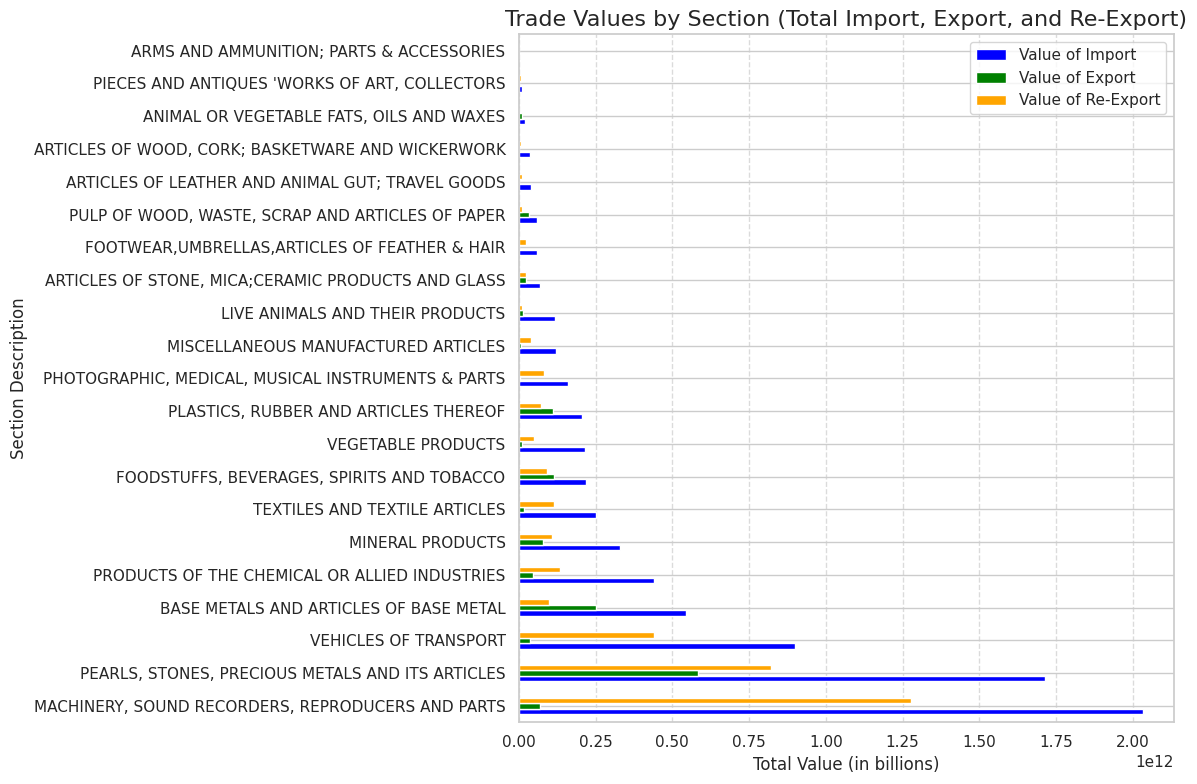

In [ ]:
# Aggregating total values of imports and exports by section description
section_summary = data.groupby('Section_Desc')[['Val_Import', 'Val_Export', 'Val_Rexport']].sum().sort_values(by='Val_Import', ascending=False)

# Visualizing trade values by section
plt.figure(figsize=(12, 8))
section_summary.plot(kind='barh', stacked=False, figsize=(12, 8), color=['blue', 'green', 'orange'])
plt.title('Trade Values by Section (Total Import, Export, and Re-Export)', fontsize=16)
plt.xlabel('Total Value (in billions)')
plt.ylabel('Section Description')
plt.legend(['Value of Import', 'Value of Export', 'Value of Re-Export'])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# New extra

# References

[1]**Pandas**: The pandas development team, 2020. pandas: powerful Python data analysis toolkit. Available at: https://pandas.pydata.org .

[2]**NumPy**: Harris, C.R., Millman, K.J., van der Walt, S.J., Gommers, R., Virtanen, P., Cournapeau, D., Wieser, E., Taylor, J., Berg, S. and Smith, N.J., 2020. Array programming with NumPy. Nature, 585(7825), pp.357-362. Available at: https://numpy.org.

[3]**Matplotlib**: Hunter, J.D., 2007. Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), pp.90-95. Available at: https://matplotlib.org.

[4]**Seaborn**:

Waskom, M., 2021. Seaborn: Statistical Data Visualization. Journal of Open Source Software, 6(60), p.3021. Available at: https://seaborn.pydata.org.

[5]**Math**: Built-in Python library for mathematical operations. Available at: https://docs.python.org/3/library/math.html.

[6]**Scikit-learn**: Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V. and Vanderplas, J., 2011. Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, pp.2825-2830. Available at: https://scikit-learn.org.

# Licence and Credits

The Dataset is about International Trade "[2011-2018 Foreign Ttrade Quarterly Data by weight-value-of-import-export-re-export](https://bayanat.ae/data?datasetID=srqKWi6IRk6GkCCu5J-RNq1M-8HvA3Zls3LbelXFVUw)" This work is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)

All Credit goes to respective Owner and Organizations.

Additional [Info](https://creativecommons.org/licenses/by/4.0/legalcode.en).